In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Reading Data and Pre-processing

In [2]:
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
movies.shape

(10329, 3)

In [5]:
# movies.describe()

In [6]:
movies["genres"] = movies['genres'].str.split("|")
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),"[Animation, Children, Comedy]"
10325,146878,Le Grand Restaurant (1966),[Comedy]
10326,148238,A Very Murray Christmas (2015),[Comedy]
10327,148626,The Big Short (2015),[Drama]


In [7]:
movies["year"] = movies["title"].str.extract("(\(\d\d\d\d-?\d*\))",expand = False)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",(1995)
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",(1995)
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",(1995)
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",(1995)
4,5,Father of the Bride Part II (1995),[Comedy],(1995)
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),"[Animation, Children, Comedy]",(2015)
10325,146878,Le Grand Restaurant (1966),[Comedy],(1966)
10326,148238,A Very Murray Christmas (2015),[Comedy],(2015)
10327,148626,The Big Short (2015),[Drama],(2015)


In [8]:
movies["year"] = movies["year"].str.extract("(\d\d\d\d)",expand = False)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),"[Animation, Children, Comedy]",2015
10325,146878,Le Grand Restaurant (1966),[Comedy],1966
10326,148238,A Very Murray Christmas (2015),[Comedy],2015
10327,148626,The Big Short (2015),[Drama],2015


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   year     10327 non-null  object
dtypes: int64(1), object(3)
memory usage: 322.9+ KB


In [10]:
movies["year"] = movies["year"].astype("Int64")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   year     10327 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 333.0+ KB


In [11]:
movies["title"] = movies["title"].str.replace("(\(\d+-?\d*\))","",regex = True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   year     10327 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 333.0+ KB


In [13]:
movies.isna().sum()

movieId    0
title      0
genres     0
year       2
dtype: int64

In [14]:
movies[movies["year"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),[(no genres listed)],<NA>
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>


In [15]:
unique_genres = set()
movies["genres"].apply(lambda x: unique_genres.update(x) if x is not np.NaN else None)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [16]:
movies.loc[movies.genres.str.join("|").str.contains("no genres listed"), "genres"] = np.NaN
movies[movies["genres"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),NaN,<NA>
10260,135460,Pablo,NaN,2012
10280,138863,The Big Broadcast of 1936,NaN,1935
10301,141305,Round Trip to Heaven,NaN,1992
10303,141472,The 50 Year Argument,NaN,2014
10317,143709,The Take,NaN,2009
10328,149532,Marco Polo: One Hundred Eyes,NaN,2015


In [17]:
unique_genres = set()
movies["genres"].apply(lambda x: unique_genres.update(x) if x is not np.NaN else None)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [18]:
# movies that contains () in title
movies.loc[list(set(movies[movies["title"].str.contains("\(")].index) - set(movies[movies["title"].str.contains("\(\w+")].index))]

,movieId,title,genres,year
953,1190,Tie Me Up! Tie Me Down! (¡Átame!),"[Crime, Drama, Romance]",1990
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>
10172,126929,Li'l Quinquin ( ),NaN,<NA>


In [19]:
movies.dropna(inplace=True)

In [20]:
movies.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10321 entries, 0 to 10327
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10321 non-null  int64 
 1   title    10321 non-null  object
 2   genres   10321 non-null  object
 3   year     10321 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 413.2+ KB


In [22]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [23]:
movies.set_index('movieId',inplace = True,drop = True)

In [24]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,Jumanji,"[Adventure, Children, Fantasy]",1995
3,Grumpier Old Men,"[Comedy, Romance]",1995
4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
5,Father of the Bride Part II,[Comedy],1995


In [25]:
movies = movies.merge(movies.genres.str.join("|").str.get_dummies(), left_index=True, right_index=True)
movies.drop(columns=["genres"], inplace=True)
movies.head()

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [27]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [28]:
timestamp = []
for time in ratings["timestamp"]:
    timestamp.append(datetime.fromtimestamp(time))
ratings["timestamp"] = timestamp
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])
ratings["timestamp"] = ratings["timestamp"].dt.year
ratings.rename(columns={"timestamp": "rating_year"}, inplace=True)
ratings.head()

,userId,movieId,rating,rating_year
0,1,16,4.0,2008
1,1,24,1.5,2008
2,1,32,4.0,2008
3,1,47,4.0,2008
4,1,50,4.0,2008


In [29]:
ratings.shape

(105339, 4)

In [30]:
print(ratings.shape)
for removed_movie in set(ratings.movieId.unique()) - set(ratings.movieId.unique()).intersection(set(movies.index)):
    ratings.drop(ratings[ratings["movieId"] == removed_movie].index, inplace=True)
print(ratings.shape)

(105339, 4)
(105331, 4)


In [31]:
ratings = ratings.join(movies, on = "movieId")
ratings.head()

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
ratings.shape

(105331, 25)

In [33]:
movies_data = ratings

## Exploratory Data Analysis

Number of movies with each rating

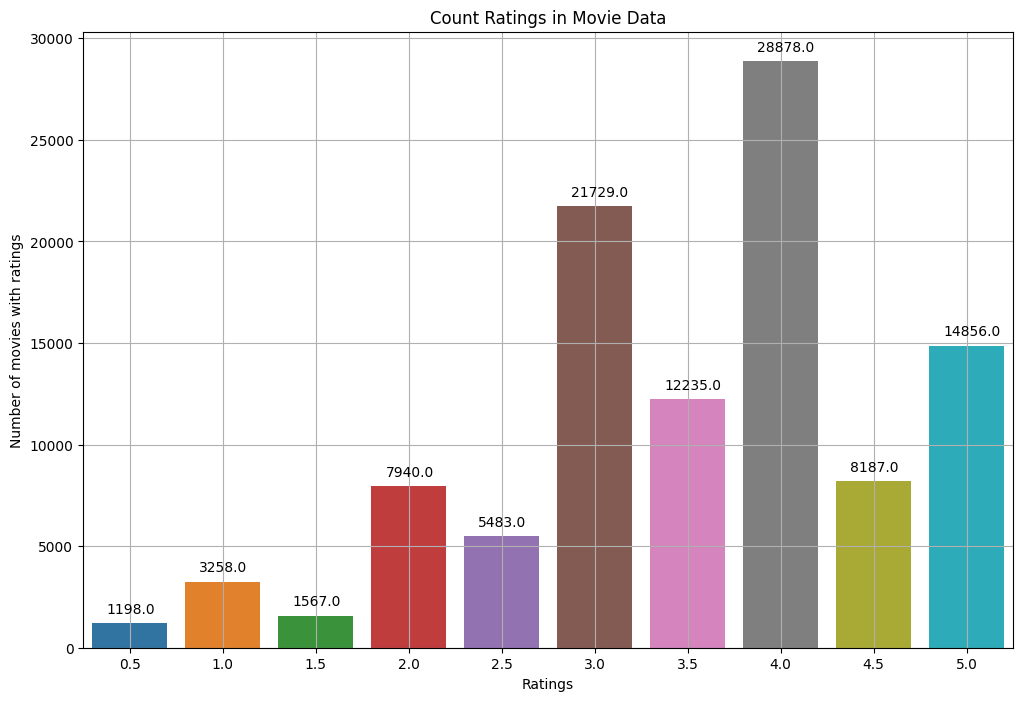

In [34]:
# 1 Count of movies asociated with each rating in the dataset
plt.figure(figsize = (12,8))
ax = sns.countplot(data = movies_data,x="rating")
for q in ax.patches:
    ax.annotate(str(q.get_height()),(q.get_x()+0.15,q.get_height()+500))
plt.xlabel("Ratings")
plt.ylabel("Number of movies with ratings")
plt.title("Count Ratings in Movie Data")
plt.grid()

In [35]:
movies_data.head(10)

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,1,110,4.0,2008,Braveheart,1995,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,150,3.0,2008,Apollo 13,1995,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1,161,4.0,2008,Crimson Tide,1995,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8,1,165,3.0,2008,Die Hard: With a Vengeance,1995,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,204,0.5,2008,Under Siege 2: Dark Territory,1995,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# movies_data[movies_data["movieId"] == 16].describe()

In [37]:
movies_ratings_mean = movies_data.groupby('movieId')[['rating']].mean().rename(columns = {"rating":"rating_mean"})
movies_ratings_count = movies_data.groupby('movieId')[['rating']].count().rename(columns = {"rating":"watch_count"})

In [38]:
movie_statistics = pd.concat([movies_ratings_mean, movies_ratings_count], axis=1)
movie_statistics = movies.join(movie_statistics, on="movieId")
movie_statistics.sort_values(by=["watch_count","rating_mean"], ascending=False, inplace=True)
movie_statistics.head(10)

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
260,Star Wars: Episode IV - A New Hope,1977,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4.188645,273.0
2571,"Matrix, The",1999,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4.264368,261.0
589,Terminator 2: Judgment Day,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.960474,253.0
527,Schindler's List,1993,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4.296371,248.0


Text(0.5, 1.0, 'Number of movies per year')

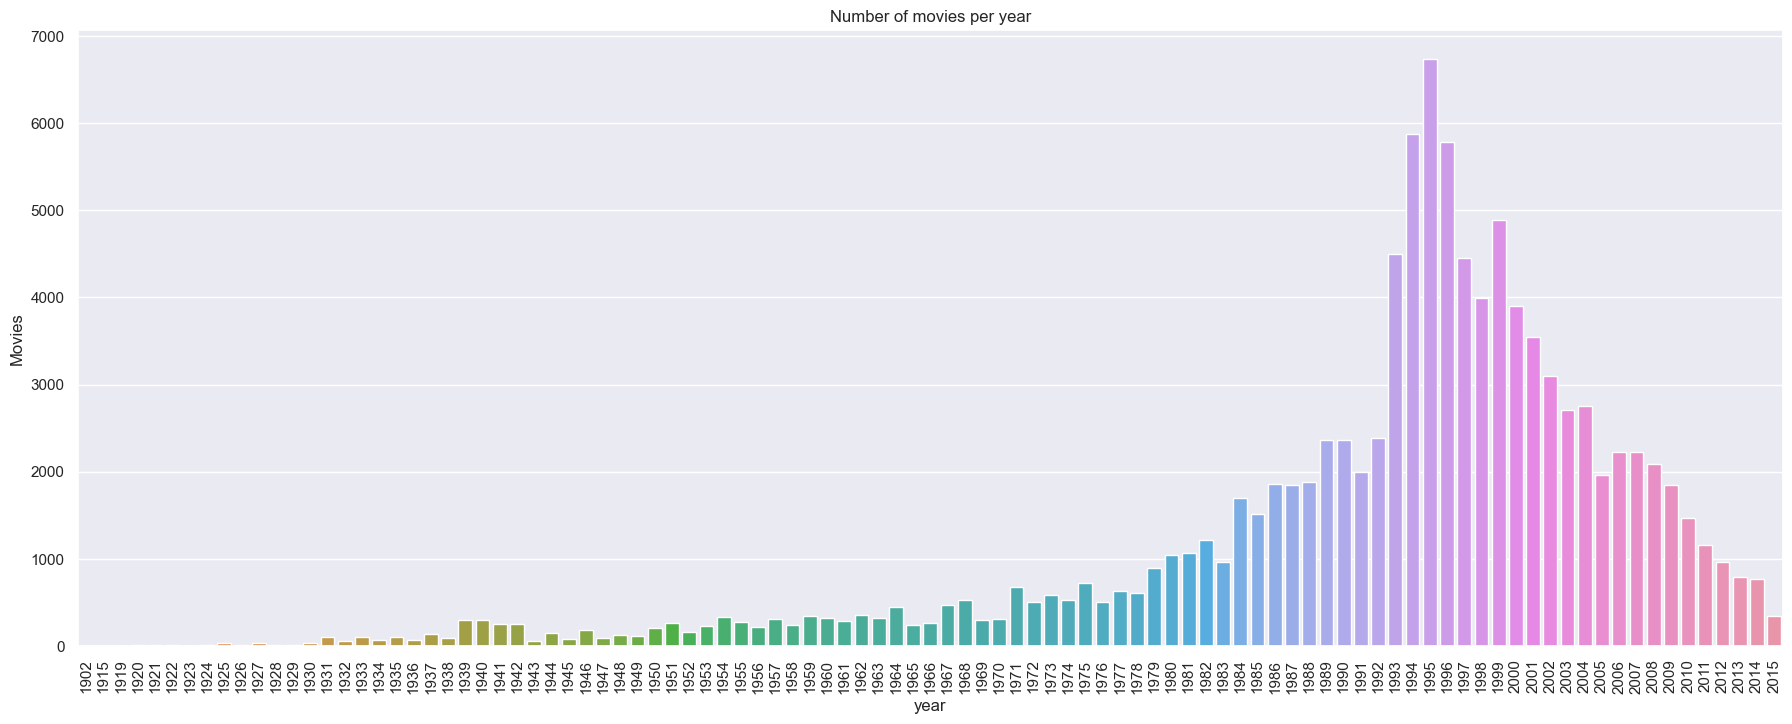

In [39]:
sns.set()
plt.figure(figsize = (22,8))
sns.countplot(x = "year",data=movies_data)
plt.xlabel("year")
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.title("Number of movies per year")

Count of movies released year-wise

Text(0.5, 1.0, 'Number of movies per year')

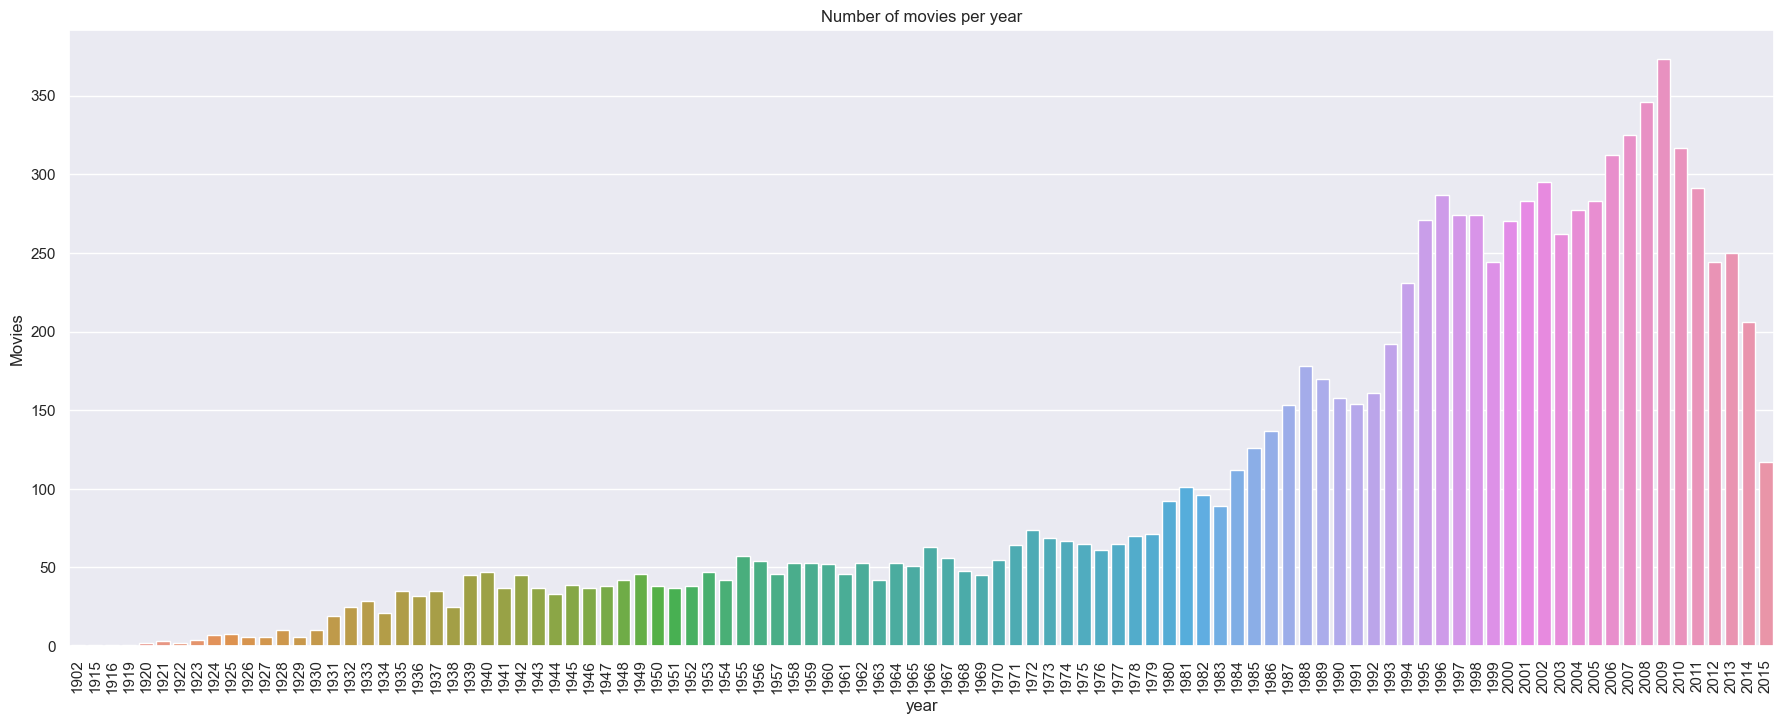

In [40]:
plt.figure(figsize = (22,8))
sns.countplot(x = "year",data=movie_statistics)
plt.xlabel("year")
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.title("Number of movies per year")

Yearly average rating

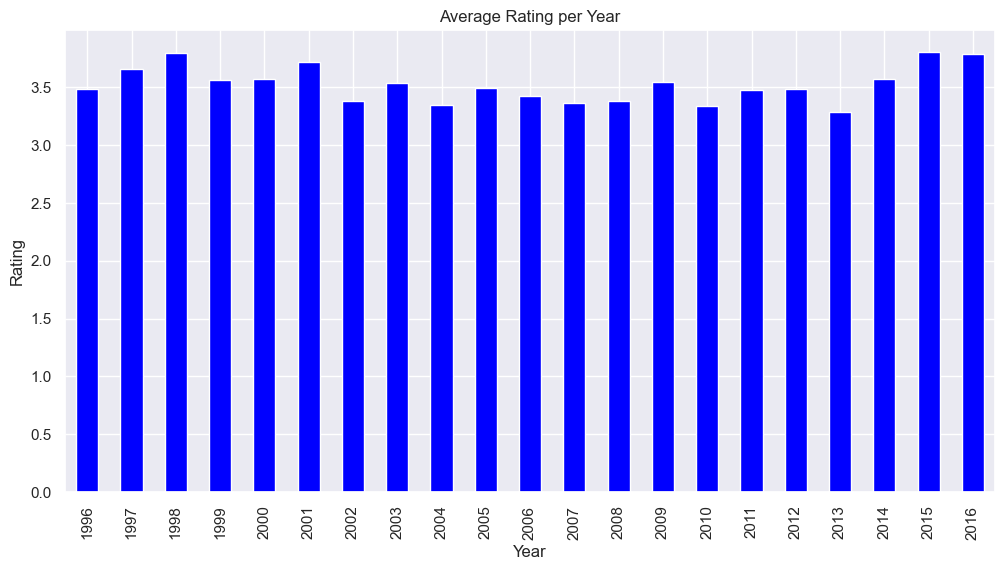

In [41]:
plt.figure(figsize = (12,6))
movies_data.groupby('rating_year')['rating'].mean().plot(kind = 'bar',color = 'blue')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average Rating per Year")
plt.show()

Year wise number of movies watched by people 

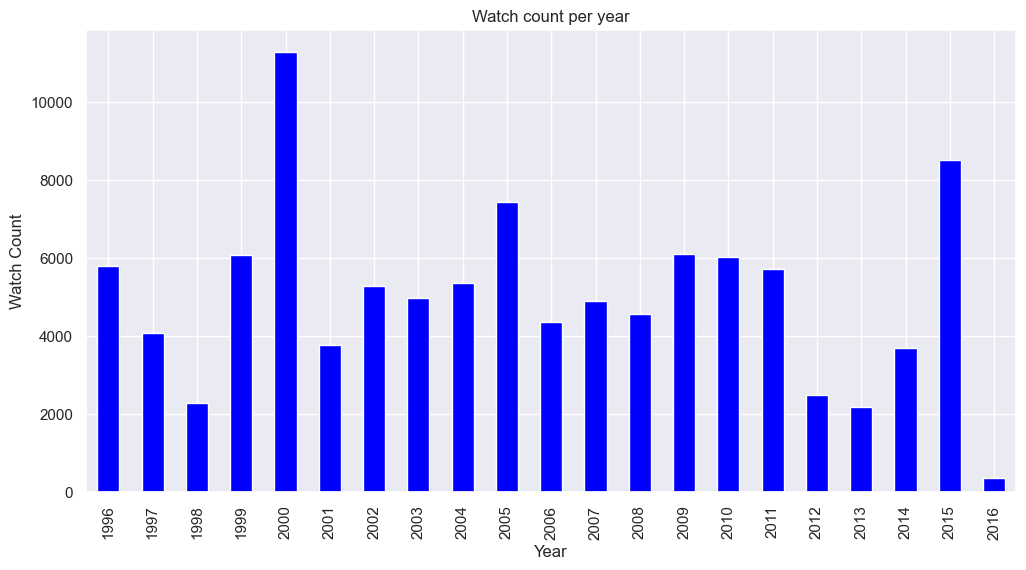

In [42]:
# Year wise number of movies watched by people 
plt.figure(figsize = (12,6))
movies_data.groupby('rating_year')['rating'].count().plot(kind = 'bar',color = 'blue')
plt.xlabel("Year")
plt.ylabel("Watch Count")
plt.title("Watch count per year")
plt.show()

<Axes: xlabel='rating_year', ylabel='count'>

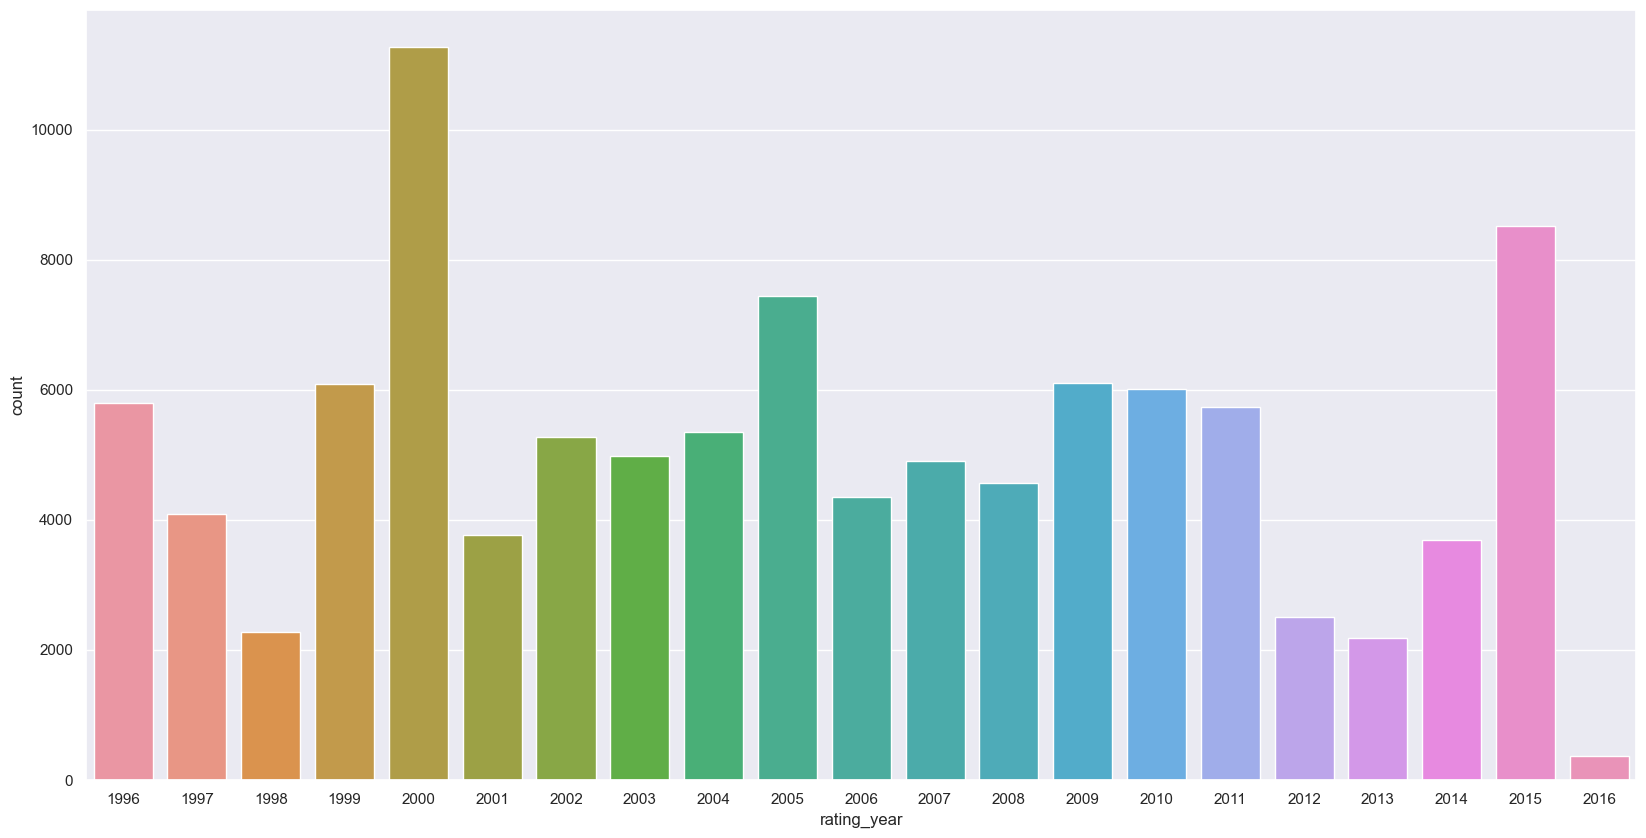

In [43]:
plt.figure(figsize = (20,10))
sns.countplot(data=movies_data, x='rating_year')

In [44]:
movie_statistics

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,Operator,2015,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.500000,1.0
7243,Intolerance: Love's Struggle Throughout the Ages,1916,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8785,Early Summer (Bakushû),1951,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


<Axes: >

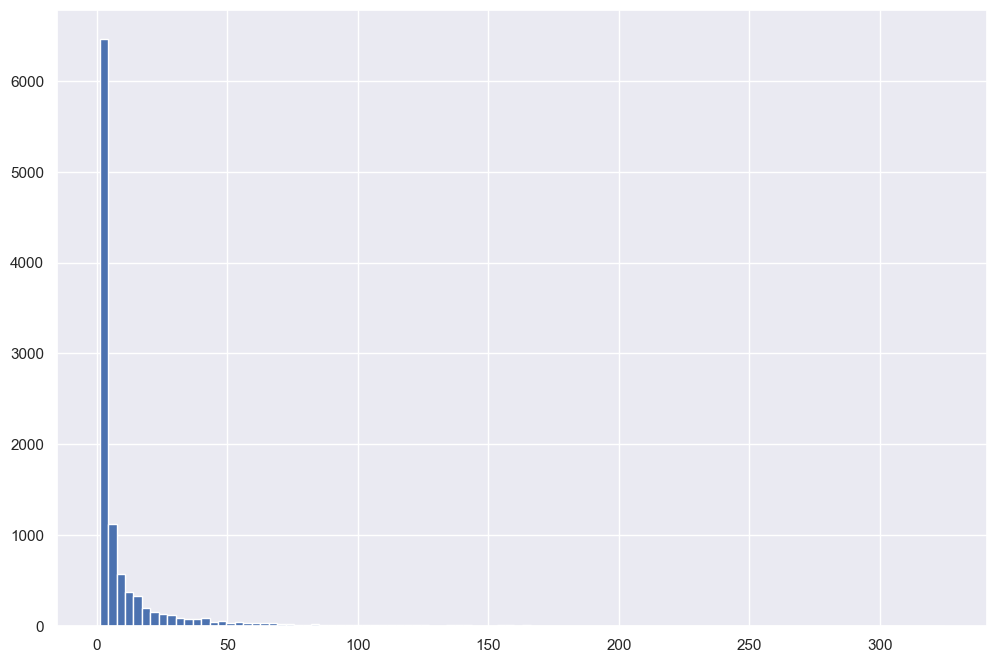

In [45]:
plt.figure(figsize = (12,8))
movie_statistics["watch_count"].hist(bins=100)

<Axes: >

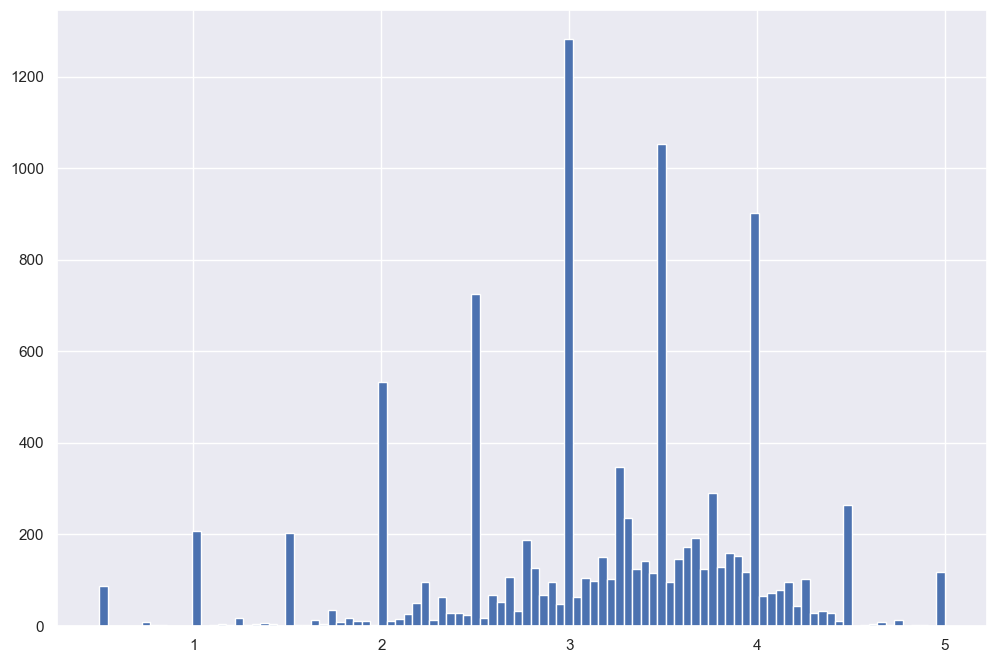

In [46]:
plt.figure(figsize = (12,8))
movie_statistics["rating_mean"].hist(bins=100)

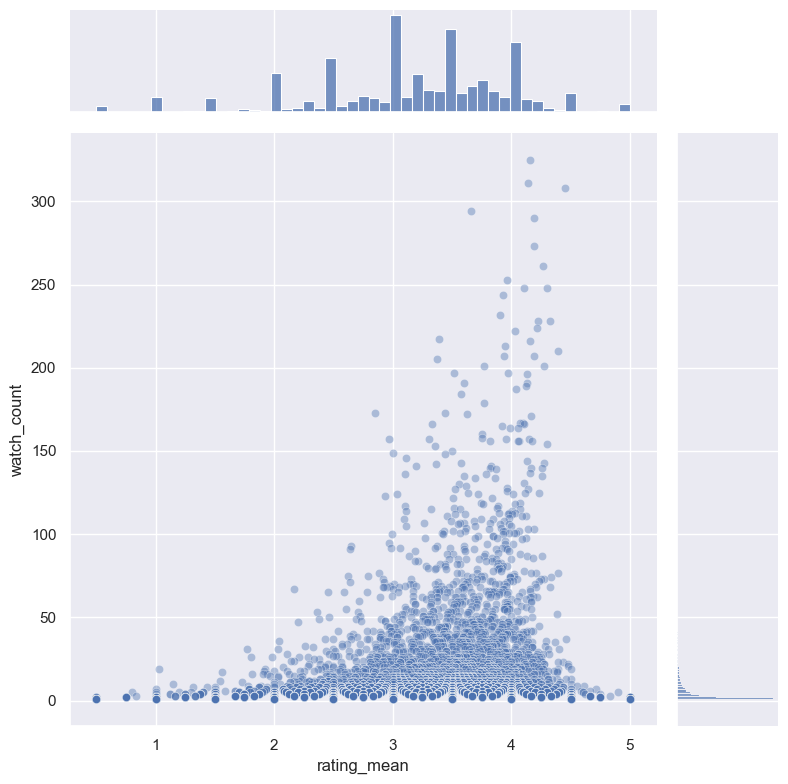

In [47]:
# plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_mean', y='watch_count', data=movie_statistics, alpha=0.4,height=8)

<Axes: xlabel='rating_mean', ylabel='watch_count'>

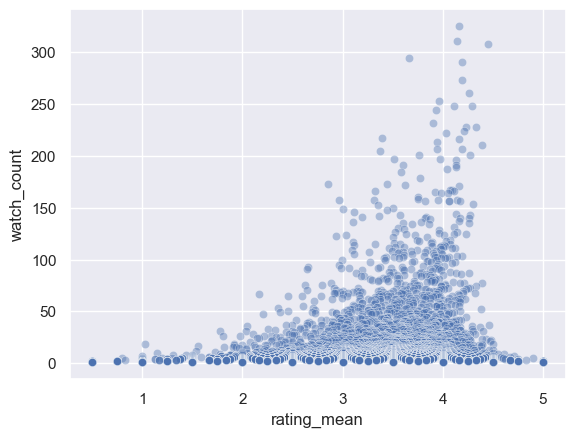

In [48]:
plt.rcParams['patch.force_edgecolor'] = True
sns.scatterplot(x='rating_mean', y='watch_count', data=movie_statistics, alpha=0.4)

In [49]:
movies_data

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,2015,Spotlight,2015,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
105335,668,142507,3.5,2015,Pawn Sacrifice,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105336,668,143385,4.0,2015,Bridge of Spies,2015,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
105337,668,144976,2.5,2015,Bone Tomahawk,2015,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [50]:
# number of people watched only one movie
# nummber of people watched only 10 movies
a = movies_data.movieId.value_counts()
a

movieId
296       325
356       311
318       308
480       294
593       290
         ... 
7408        1
7719        1
7919        1
8631        1
142507      1
Name: count, Length: 10317, dtype: int64

In [51]:
a.value_counts()

count
1      3630
2      1455
3       838
4       539
5       484
       ... 
165       1
110       1
171       1
129       1
325       1
Name: count, Length: 184, dtype: int64

In [52]:
# number of people watched only one movie
# nummber of people watched only 10 movies
movies_data.movieId.count()

105331

Text(0.5, 1.0, 'Number of movies vs Number of watch counts')

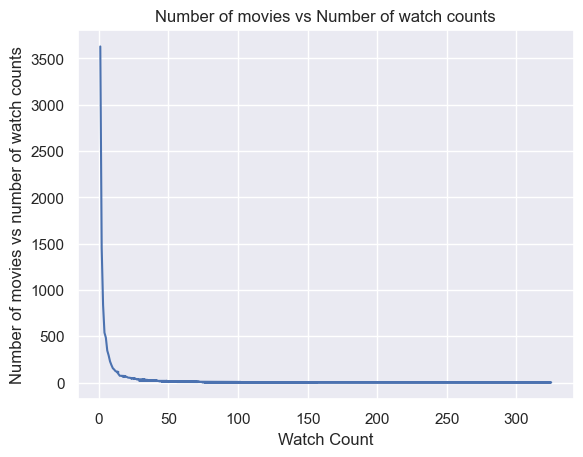

In [53]:
watch_count = movies_data.groupby("movieId")["rating"].count()
watch_value_count = watch_count.value_counts()
plt.plot(watch_value_count.index, watch_value_count)
plt.xlabel("Watch Count")
plt.ylabel("Number of movies vs number of watch counts")
plt.title("Number of movies vs Number of watch counts")

In [54]:
movies_with_watch_count_less_than_25 = watch_count[watch_count < 25].index
movies_with_watch_count_less_than_25 = list(movies_with_watch_count_less_than_25)
len(movies_with_watch_count_less_than_25)

9253

In [55]:
movies.drop(movies_with_watch_count_less_than_25, axis=0,inplace = True)
movies_data.drop(movies_data[movies_data["movieId"].isin(movies_with_watch_count_less_than_25)].index,axis = 0, inplace=True)
movie_statistics.drop(movies_with_watch_count_less_than_25, axis=0,inplace=True)

In [56]:
movie_statistics

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,Superman III,1983,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.340000,25.0
7243,Intolerance: Love's Struggle Throughout the Ages,1916,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8785,Early Summer (Bakushû),1951,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


<Axes: xlabel='rating_mean', ylabel='watch_count'>

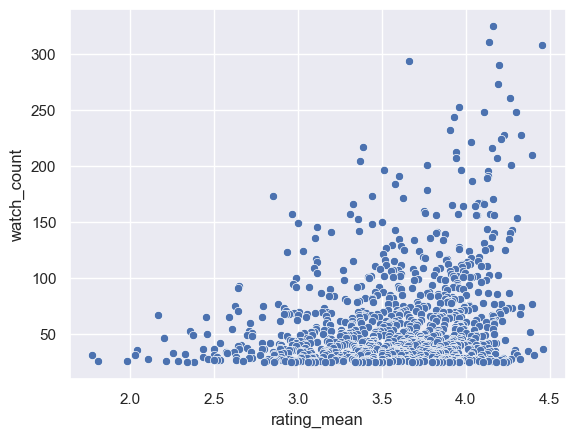

In [57]:
sns.scatterplot(x="rating_mean",y="watch_count",data=movie_statistics)


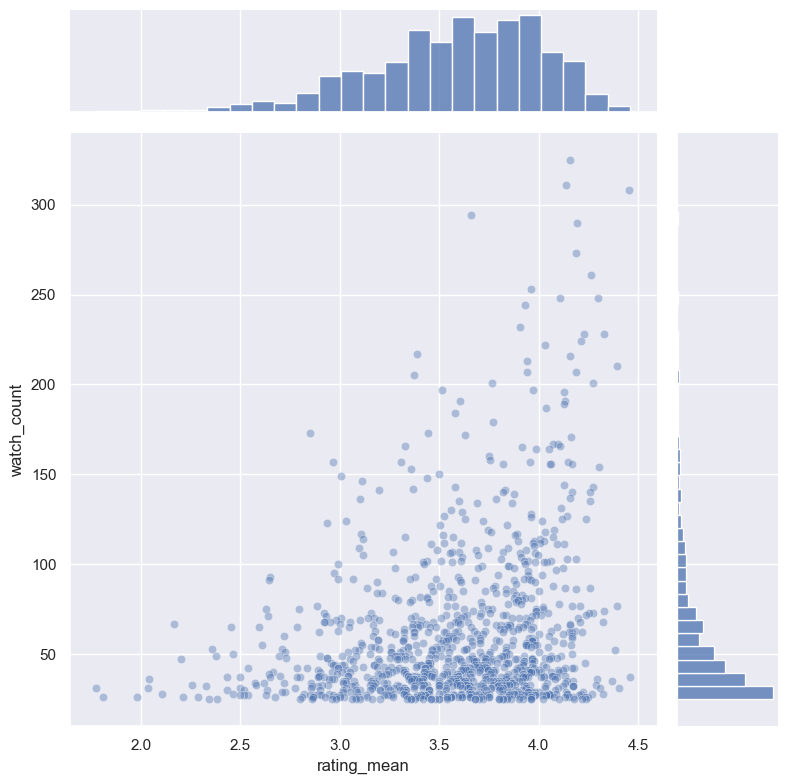

In [58]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_mean', y='watch_count', data=movie_statistics, alpha=0.4,height=8)

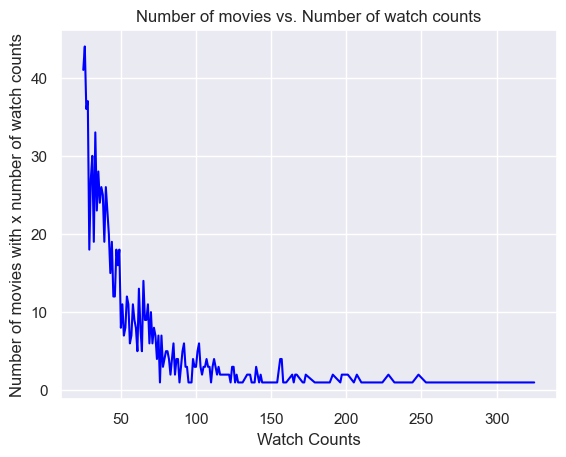

In [59]:
watch_count = movies_data.groupby('movieId')["rating"].count()
watch_value_count = watch_count.value_counts()
# watch_count
# watch_value_count
watch_value_count = watch_value_count[watch_value_count.index.sort_values()]
plt.xlabel("Watch Counts")
plt.ylabel("Number of movies with x number of watch counts")
plt.title("Number of movies vs. Number of watch counts")
plt.plot(watch_value_count.index, watch_value_count.values, color="blue")


In [63]:
movie_statistics

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,Superman III,1983,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.340000,25.0
7243,Intolerance: Love's Struggle Throughout the Ages,1916,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8785,Early Summer (Bakushû),1951,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


In [64]:
top_ten_movies_idx = movie_statistics.head(10).index
top_ten_movies_idx

Index([296, 356, 318, 480, 593, 260, 2571, 589, 527, 110], dtype='int64', name='movieId')

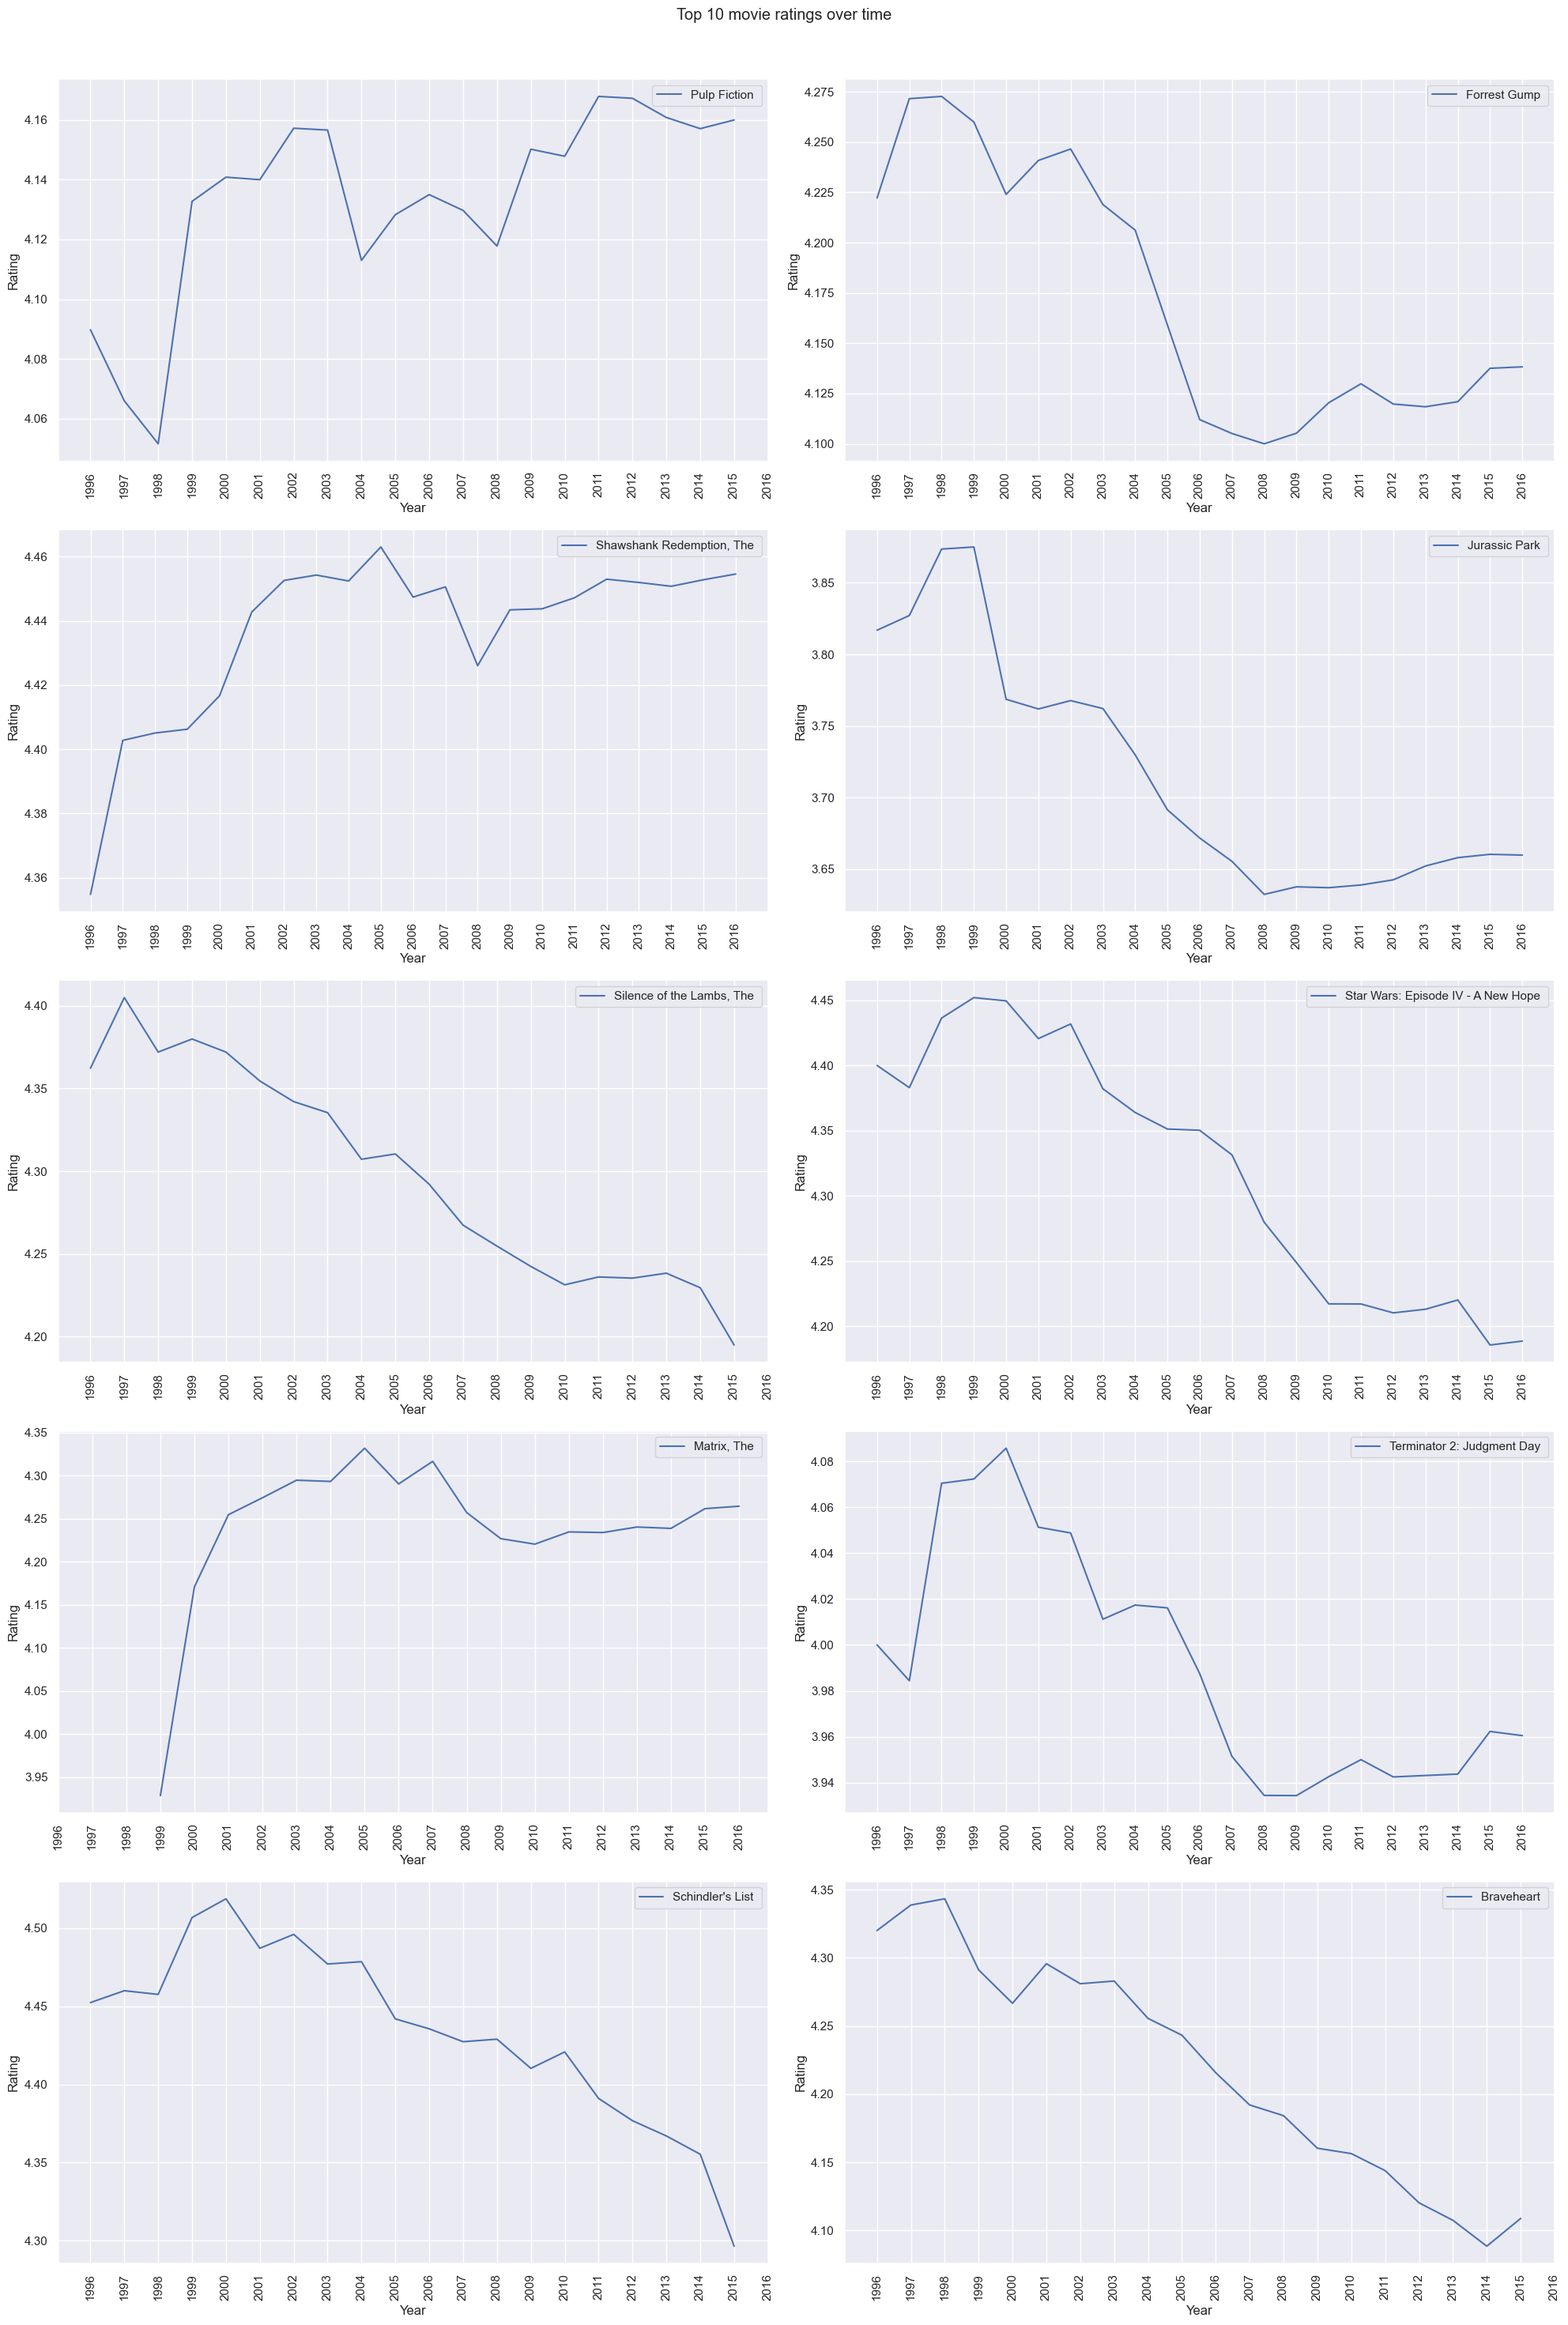

In [65]:
top_ten_movies_idx = movie_statistics.head(10).index
fig, ax = plt.subplots(5,2)
i = 0
fig.suptitle('Top 10 movie ratings over time')
fig.set_figheight(30)
fig.set_figwidth(20)
for movie_idx in top_ten_movies_idx:
    temp = movies_data[movies_data["movieId"] == movie_idx].sort_values(by="rating_year",ascending=True)
    cum_sum = temp.groupby("rating_year")["rating"].sum().cumsum()
    cum_count = temp.groupby("rating_year")["rating"].count().cumsum()
    l = cum_sum/cum_count
    ax[i//2,i%2].set_xlabel("Year")
    ax[i//2,i%2].set_ylabel("Rating")
    ax[i//2,i%2].plot(l.index,l.values,label=movie_statistics.loc[movie_idx].title)
    ax[i//2,i%2].legend()
    ax[i//2,i%2].set_xticks([j for j in range(1996,2017)],[j for j in range(1996,2017)],rotation=90)
    i += 1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

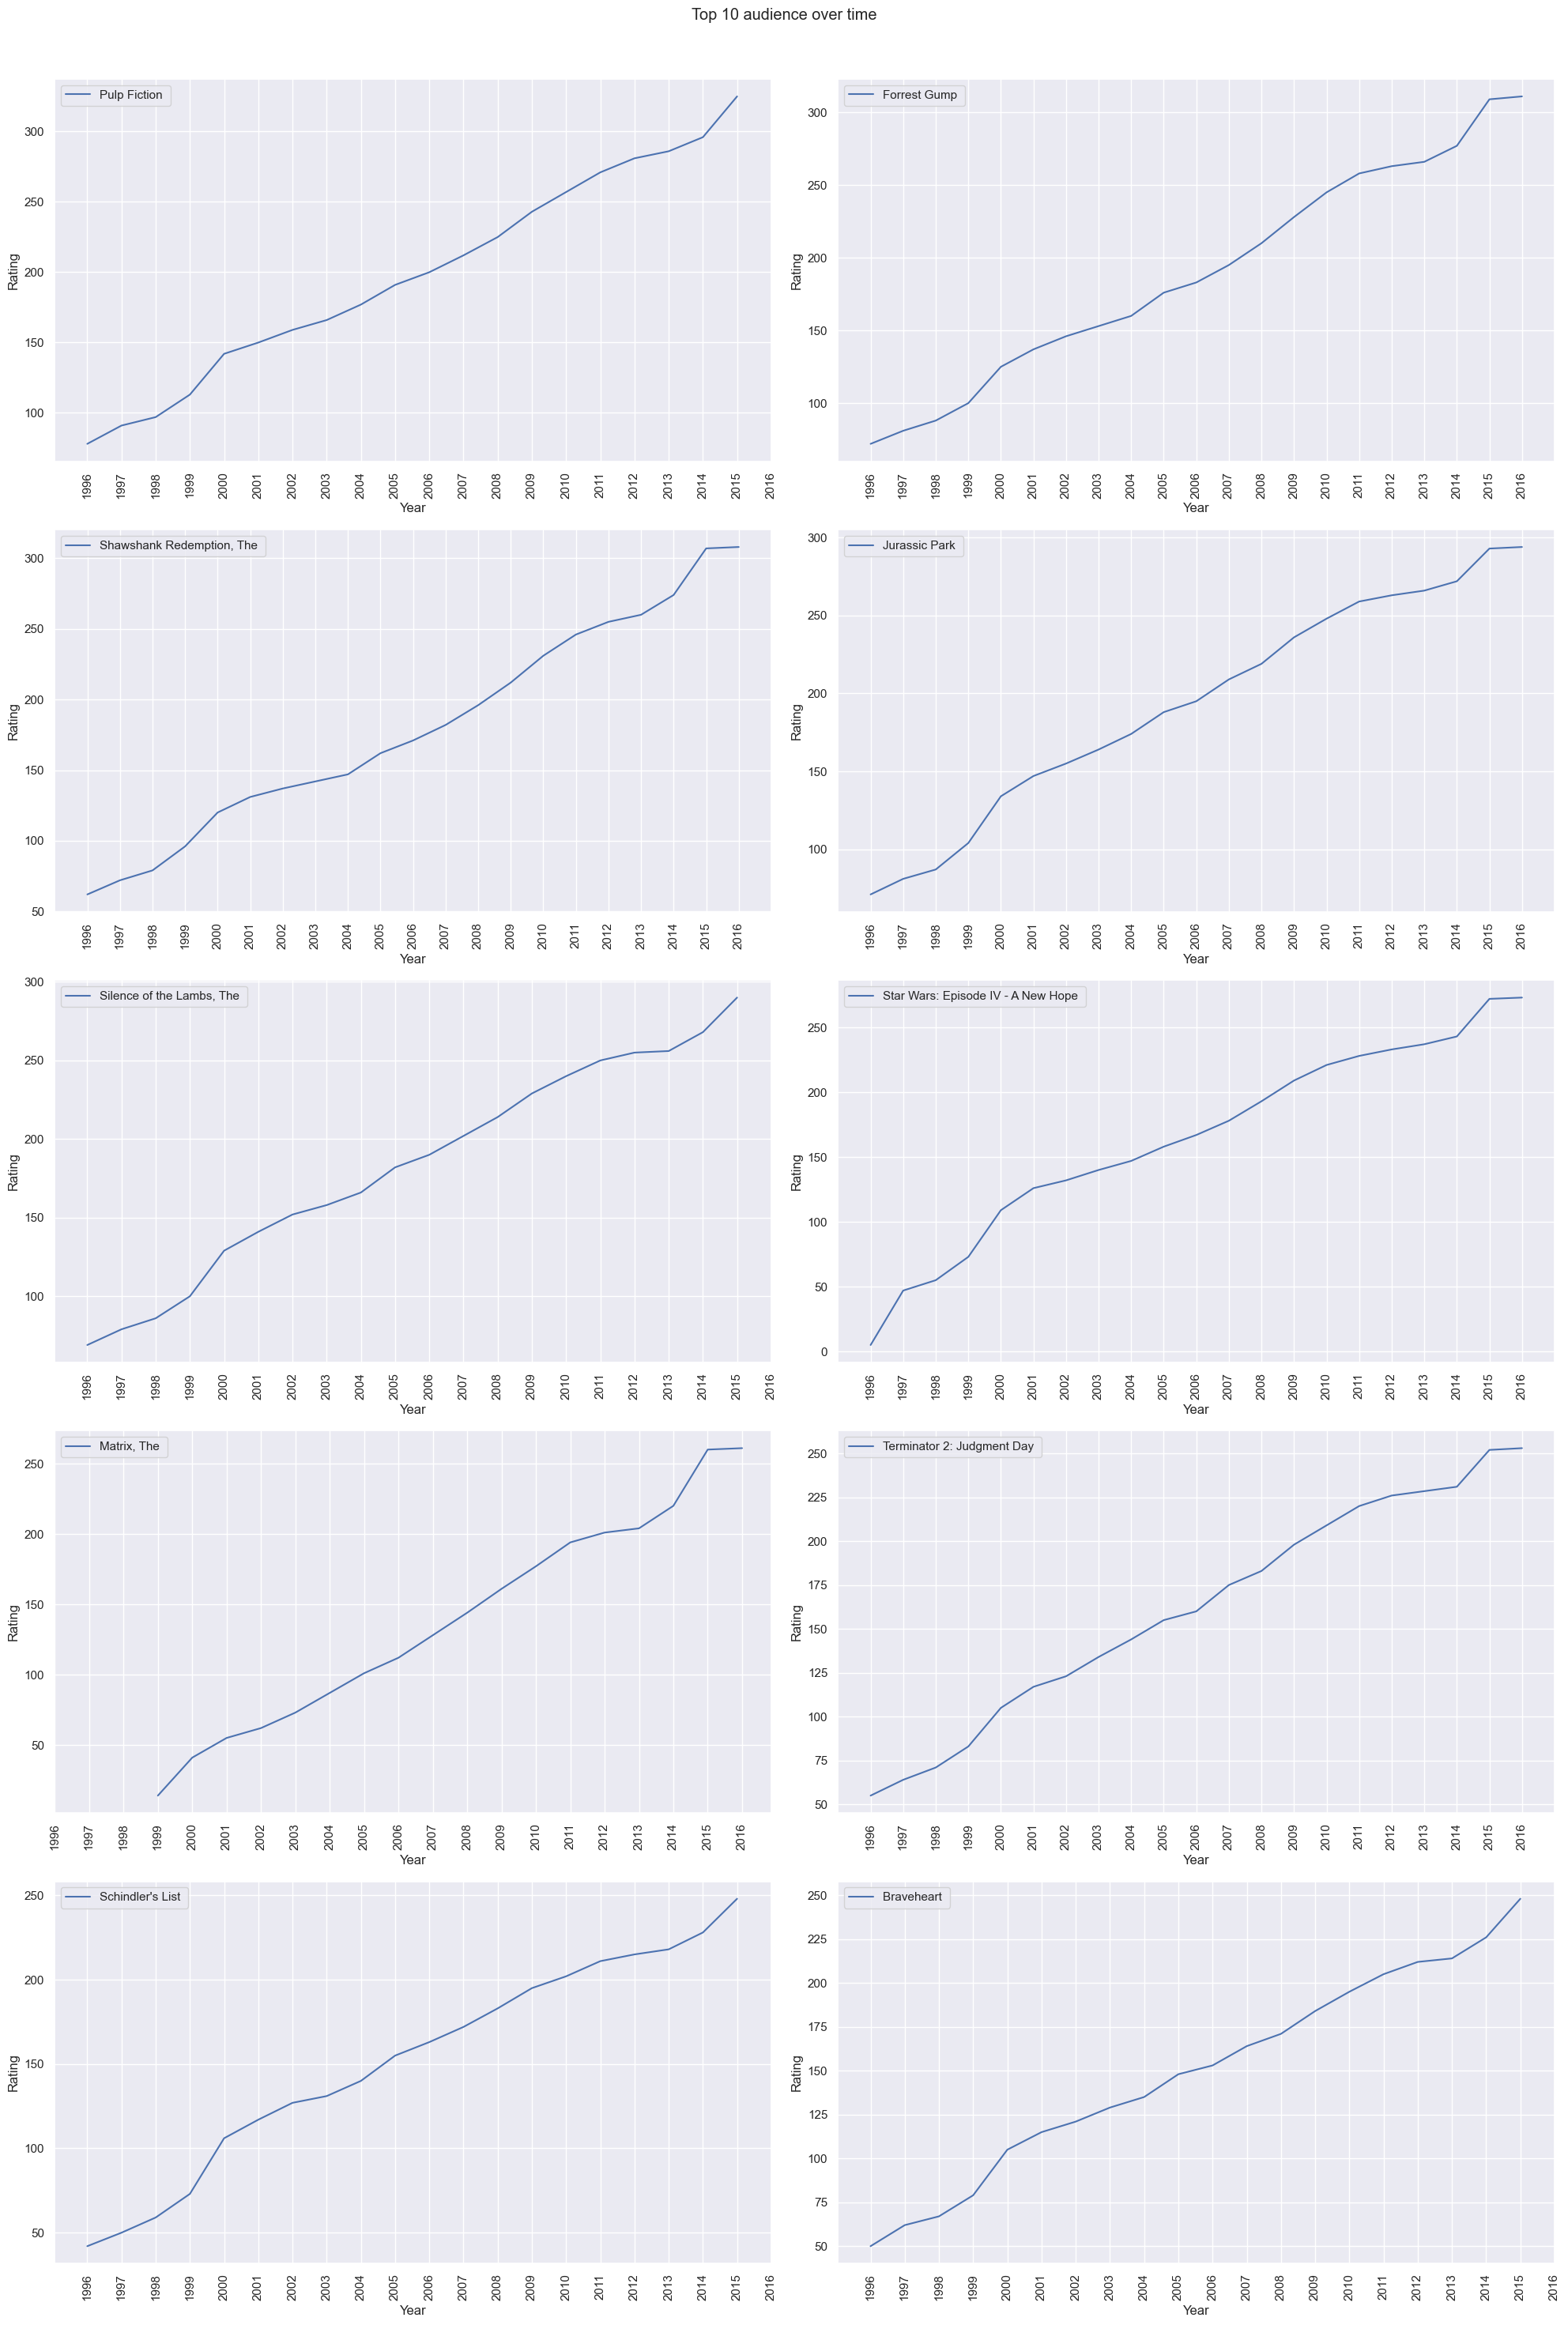

In [66]:
top_ten_movies_idx = movie_statistics.head(10).index
fig, ax = plt.subplots(5,2)
i = 0
fig.suptitle('Top 10 audience over time')
fig.set_figheight(30)
fig.set_figwidth(20)
for movie_idx in top_ten_movies_idx:
    temp = movies_data[movies_data["movieId"] == movie_idx].sort_values(by="rating_year",ascending=True)
    cum_sum = temp.groupby("rating_year")["rating"].sum().cumsum()
    cum_count = temp.groupby("rating_year")["rating"].count().cumsum()
    l = cum_sum/cum_count
    ax[i//2,i%2].set_xlabel("Year")
    ax[i//2,i%2].set_ylabel("Rating")
    ax[i//2,i%2].plot(l.index,cum_count.values,label=movie_statistics.loc[movie_idx].title)
    ax[i//2,i%2].legend()
    ax[i//2,i%2].set_xticks([j for j in range(1996,2017)],[j for j in range(1996,2017)],rotation=90)
    i += 1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

--------------------------------------------Can ignore from here-----------------------------------------------

In [68]:
movies_data

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105148,668,109374,4.0,2014,"Grand Budapest Hotel, The",2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105151,668,109487,4.0,2014,Interstellar,2014,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
105185,668,111759,3.0,2014,Edge of Tomorrow,2014,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
105205,668,112852,4.0,2015,Guardians of the Galaxy,2014,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
top = movie_statistics.head(1).index
top

Index([296], dtype='int64', name='movieId')

In [70]:
for i in top:
    tem = movies_data[movies_data["movieId"] == i].sort_values(by="rating_year",ascending = True)
    cum_sum = tem.groupby("rating_year")["rating"].sum().cumsum()
    cum_count = tem.groupby("rating_year")["rating"].count().cumsum()
tem

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
13443,111,296,5.0,1996,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38956,266,296,3.0,1996,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48455,349,296,3.0,1996,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18371,143,296,2.0,1996,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18138,140,296,4.0,1996,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21409,164,296,4.0,2015,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21032,161,296,3.0,2015,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
88604,592,296,5.0,2015,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
90891,604,296,5.0,2015,Pulp Fiction,1994,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
cum_sum

rating_year
1996     319.0
1997     370.0
1998     393.0
1999     467.0
2000     588.0
2001     621.0
2002     661.0
2003     690.0
2004     728.0
2005     788.5
2006     827.0
2007     875.5
2008     926.5
2009    1008.5
2010    1066.0
2011    1129.5
2012    1171.0
2013    1190.0
2014    1230.5
2015    1352.0
Name: rating, dtype: float64

In [72]:
cum_count

rating_year
1996     78
1997     91
1998     97
1999    113
2000    142
2001    150
2002    159
2003    166
2004    177
2005    191
2006    200
2007    212
2008    225
2009    243
2010    257
2011    271
2012    281
2013    286
2014    296
2015    325
Name: rating, dtype: int64

In [73]:
b = cum_sum/cum_count
b

rating_year
1996    4.089744
1997    4.065934
1998    4.051546
1999    4.132743
2000    4.140845
2001    4.140000
2002    4.157233
2003    4.156627
2004    4.112994
2005    4.128272
2006    4.135000
2007    4.129717
2008    4.117778
2009    4.150206
2010    4.147860
2011    4.167897
2012    4.167260
2013    4.160839
2014    4.157095
2015    4.160000
Name: rating, dtype: float64

Text(0.5, 1.0, 'rating over an year')

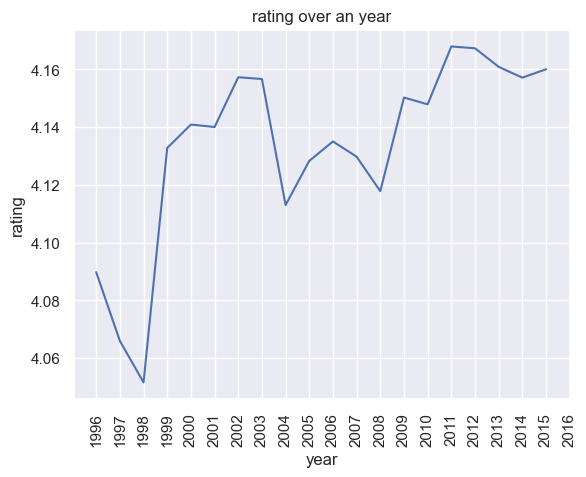

In [74]:
plt.plot(b.index,b.values)
plt.xticks([i for i in range(1996,2017)], rotation = 90)
plt.xlabel("year")
plt.ylabel("rating")
plt.title("rating over an year")

---------------------------------------------------------till----------------------------------------------------------------------

In [75]:
movies

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Heat,1995,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109487,Interstellar,2014,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
111759,Edge of Tomorrow,2014,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
112852,Guardians of the Galaxy,2014,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
movies.columns

Index(['title', 'year', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [133]:
print("-----------------------Number of movies Genre wise-----------------------")
list_genre = ['Action', 'Adventure', 'Animation', 'Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir','Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller','War', 'Western']
for genre in list_genre:
    temp1 = movie_statistics[movie_statistics[genre] == 1]
    print(genre," :\n\tNumber of movies released : ", temp1[genre].sum(), "\n\tNumber of people watched  : ",temp1["watch_count"].sum())

-----------------------Number of movies Genre wise-----------------------
Action  :
	Number of movies released :  339 
	Number of people watched  :  22755.0
Adventure  :
	Number of movies released :  255 
	Number of people watched  :  17639.0
Animation  :
	Number of movies released :  65 
	Number of people watched  :  4092.0
Children  :
	Number of movies released :  81 
	Number of people watched  :  5388.0
Comedy  :
	Number of movies released :  402 
	Number of people watched  :  23687.0
Crime  :
	Number of movies released :  183 
	Number of people watched  :  12351.0
Documentary  :
	Number of movies released :  5 
	Number of people watched  :  188.0
Drama  :
	Number of movies released :  476 
	Number of people watched  :  27136.0
Fantasy  :
	Number of movies released :  120 
	Number of people watched  :  7809.0
Film-Noir  :
	Number of movies released :  14 
	Number of people watched  :  681.0
Horror  :
	Number of movies released :  72 
	Number of people watched  :  4105.0
IMAX  :
	Num

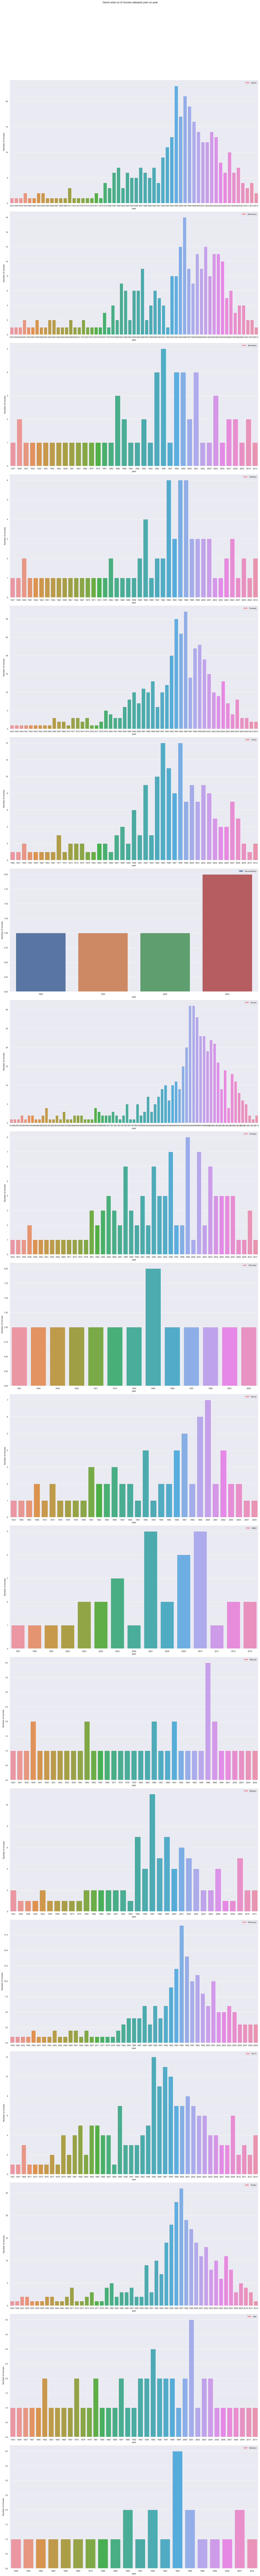

In [116]:
fig, ax = plt.subplots(19,1)
fig.suptitle("Genre wise no of movies released year-on-year")
fig.set_figheight(200)
fig.set_figwidth(20)
i = 0
for genre in list_genre:
    temp1 = movies[movies[genre] == 1]
    temp2 = movie_statistics[movie_statistics.index.isin(temp1.index)].sort_values(by=["year","rating_mean"])
    x = temp2.groupby("year").count()
    sns.countplot(data = temp2,x="year",ax=ax[i],label=genre)
    ax[i].legend()
    ax[i].set_ylabel("Number of movies")
#     ax[i].plot(x.index,x.values)
    i += 1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

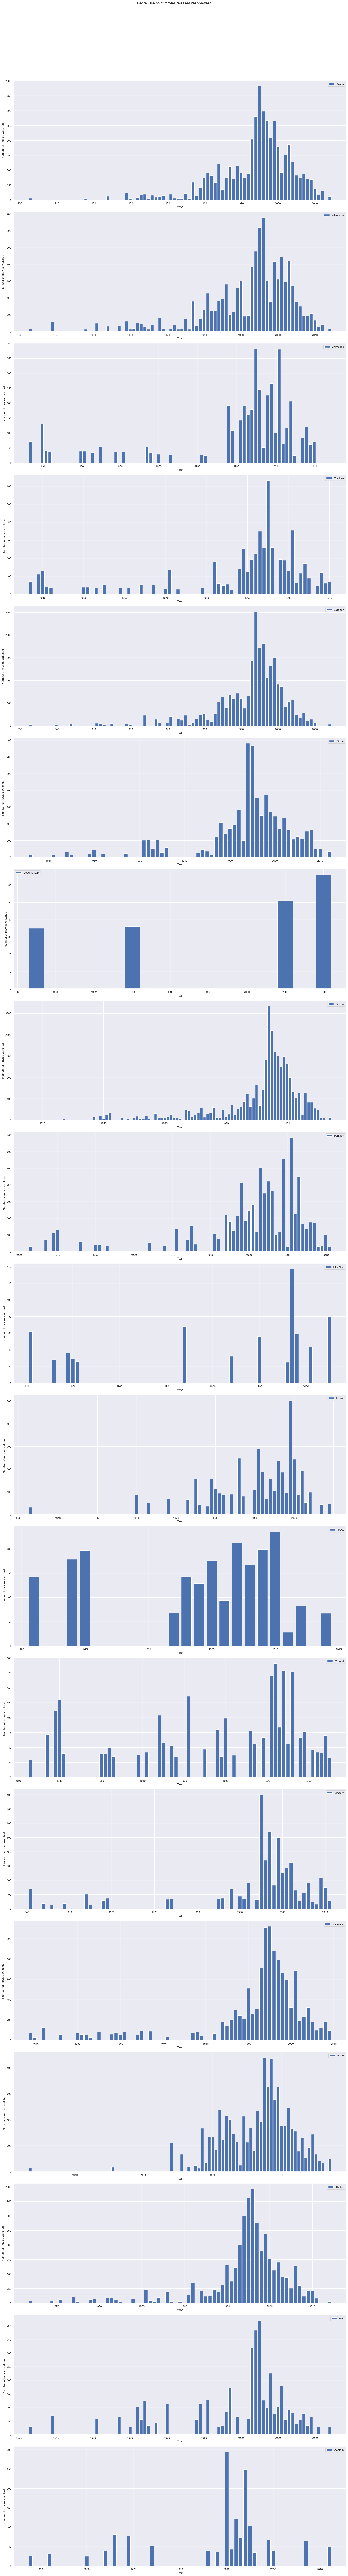

In [121]:
fig, ax = plt.subplots(19,1)
fig.suptitle("Genre wise no of movies released year-on-year")
fig.set_figheight(150)
fig.set_figwidth(20)
i = 0
for genre in list_genre:
    temp1 = movies[movies[genre] == 1]
    temp2 = movie_statistics[movie_statistics.index.isin(temp1.index)].sort_values(by=["year","rating_mean"])
    x = temp2.groupby("year")["watch_count"].sum()
    ax[i].bar(x.index,x.values,label=genre)
    ax[i].legend()
    ax[i].set_ylabel("Number of movies watched ")
    ax[i].set_xlabel("Year")

    i += 1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

In [76]:
#output1
action_movies = movies[movies["Action"] == 1]
action_movies

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
6,Heat,1995,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,GoldenEye,1995,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,Mortal Kombat,1995,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,From Dusk Till Dawn,1996,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
95,Broken Arrow,1996,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91529,"Dark Knight Rises, The",2012,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
96610,Looper,2012,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
99114,Django Unchained,2012,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [77]:
movies_data

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105148,668,109374,4.0,2014,"Grand Budapest Hotel, The",2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105151,668,109487,4.0,2014,Interstellar,2014,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
105185,668,111759,3.0,2014,Edge of Tomorrow,2014,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
105205,668,112852,4.0,2015,Guardians of the Galaxy,2014,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
lol = movies_data[movies_data["movieId"].isin(action_movies.index)]
lol

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5,1,110,4.0,2008,Braveheart,1995,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,165,3.0,2008,Die Hard: With a Vengeance,1995,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,204,0.5,2008,Under Siege 2: Dark Territory,1995,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,260,4.5,2008,Star Wars: Episode IV - A New Hope,1977,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17,1,349,4.5,2008,Clear and Present Danger,1994,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104759,668,91529,4.0,2012,"Dark Knight Rises, The",2012,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
104883,668,96610,3.0,2013,Looper,2012,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
104954,668,99114,3.5,2013,Django Unchained,2012,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105185,668,111759,3.0,2014,Edge of Tomorrow,2014,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [81]:
#output2
ac = movie_statistics[movie_statistics.index.isin(action_movies.index)].sort_values(by=["year","rating_mean"])
ac

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
2366,King Kong,1933,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.532258,31.0
1254,"Treasure of the Sierra Madre, The",1948,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,4.250000,26.0
2019,Seven Samurai (Shichinin no samurai),1954,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.217742,62.0
1287,Ben-Hur,1959,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.062500,48.0
908,North by Northwest,1959,1,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,4.273973,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96610,Looper,2012,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,4.037037,27.0
99114,Django Unchained,2012,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,4.061224,49.0
91529,"Dark Knight Rises, The",2012,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,4.121951,41.0


In [135]:
ac["watch_count"].sum()

22755.0

In [117]:
ac.groupby("year")["watch_count"].sum()

year
1933      31.0
1948      26.0
1954      62.0
1959     121.0
1960      28.0
1962      43.0
1963      92.0
1964      97.0
1965      25.0
1966      81.0
1967      44.0
1968      58.0
1969      78.0
1971      98.0
1972      30.0
1973      26.0
1974      28.0
1975     109.0
1976      26.0
1977     299.0
1978      69.0
1979     208.0
1980     368.0
1981     454.0
1982     411.0
1983     296.0
1984     606.0
1985     176.0
1986     373.0
1987     562.0
1988     355.0
1989     574.0
1990     460.0
1991     370.0
1992     446.0
1993    1019.0
1994    1403.0
1995    1911.0
1996    1488.0
1997    1336.0
1998    1048.0
1999    1324.0
2000     895.0
2001     463.0
2002     753.0
2003     933.0
2004     637.0
2005     414.0
2006     372.0
2007     436.0
2008     351.0
2009     346.0
2010     193.0
2011      85.0
2012     158.0
2014      60.0
Name: watch_count, dtype: float64

In [82]:
movie_statistics

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,Superman III,1983,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.340000,25.0
7243,Intolerance: Love's Struggle Throughout the Ages,1916,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8785,Early Summer (Bakushû),1951,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


In [99]:
movies

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Heat,1995,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109487,Interstellar,2014,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
111759,Edge of Tomorrow,2014,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
112852,Guardians of the Galaxy,2014,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

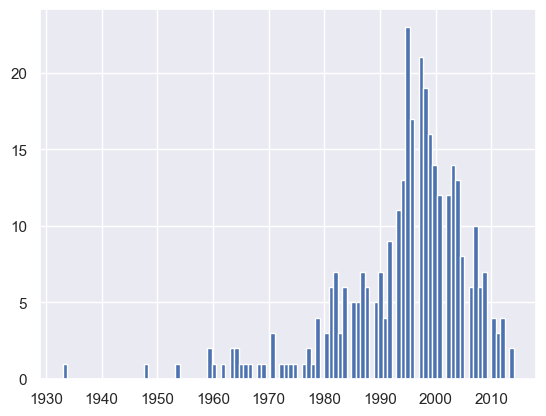

In [83]:
ac["year"].hist(bins=100)

Text(0.5, 1.0, 'Number of Action movies per year')

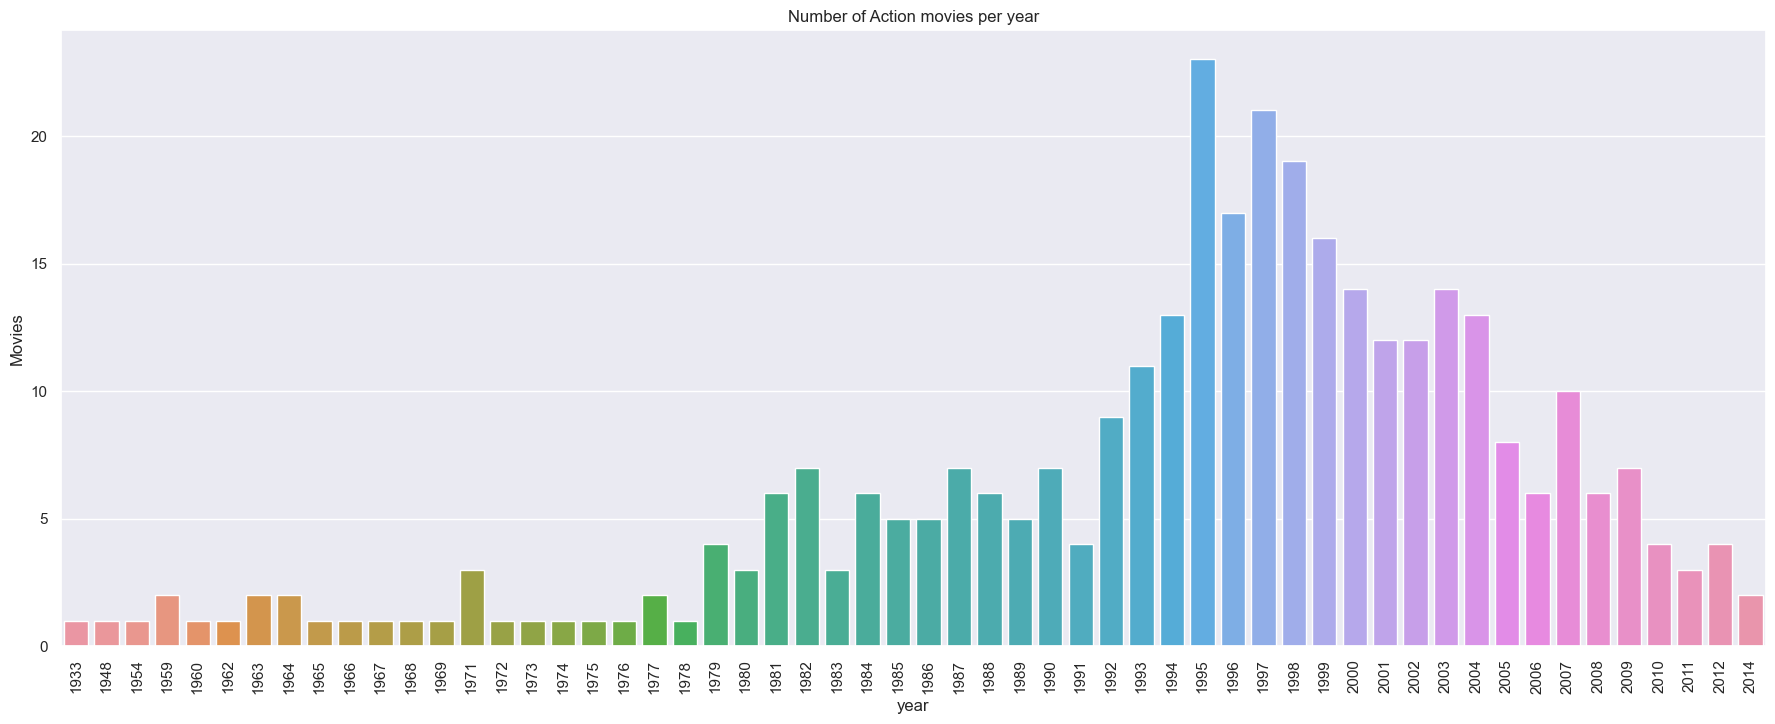

In [85]:
plt.figure(figsize=(22,8))
sns.set()
sns.countplot(x="year",data=ac)
plt.xlabel("year")
plt.xticks(rotation=90)
plt.ylabel("Movies")
plt.title("Number of Action movies per year")

Text(0.5, 1.0, 'Number of Action movies per year')

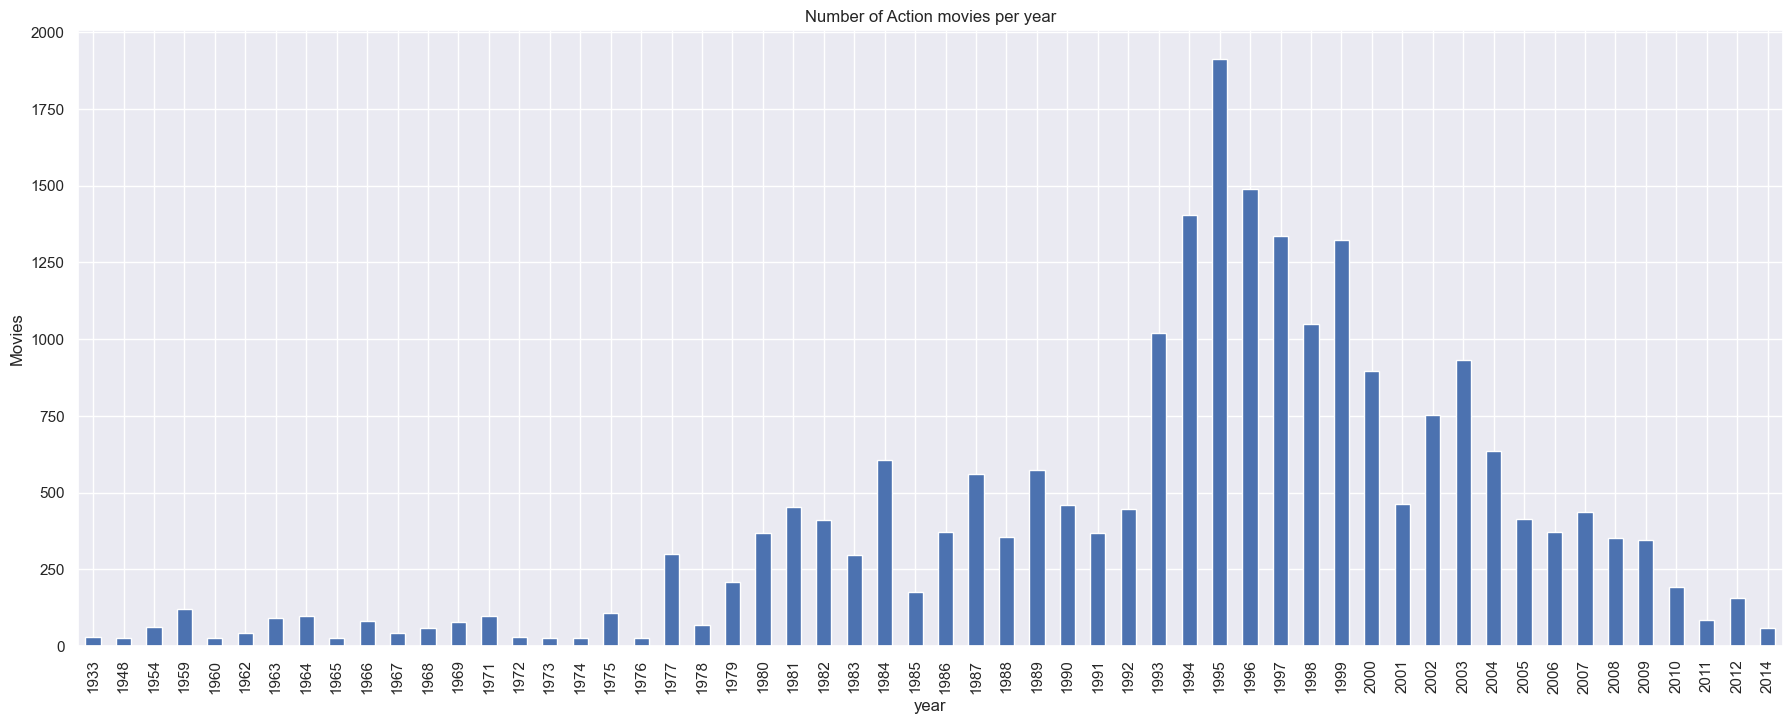

In [89]:
# year wise releassed movies ni etha mandi chusaru, 
# say in 2000 3 action movies released so number of people watced those movies

# number_ppl_watched_action_movie = 
plt.figure(figsize=(22,8))
sns.set()
ac.groupby("year")["watch_count"].sum().plot(kind="bar")
plt.ylabel("Movies")
plt.title("Number of Action movies per year")

In [87]:
# which genre people preferred to watch overall
# year wise which genre movie people watched more,
# year wise highest rated movie
# year wise which movie was watched more

In [136]:
#year wise which movie was watched most
movie_statistics

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,Superman III,1983,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.340000,25.0
7243,Intolerance: Love's Struggle Throughout the Ages,1916,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8785,Early Summer (Bakushû),1951,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


In [138]:
most_movies = movie_statistics.copy()

In [148]:
most_movies.groupby("year")[["watch_count"]].max()["movieId"]

KeyError: 'movieId'

In [147]:
most_movies[most_movies["year"].isin(most_movies.groupby("year")[["watch_count"]].max().index) most_movies["watch_count"] == most_movies.groupby("year")[["watch_count"]].max()]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (167240952.py, line 1)